In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


In [3]:
!ls ../mini-sims

118ns_sim.npz 196ns_sim.npz 40ns_sim.npz
157ns_sim.npz 1ns_sim.npz   79ns_sim.npz


In [4]:
lengths = ['1', '40', '79', '118', '157', '196']

In [5]:
viscos = pd.DataFrame()
for ns in lengths:
    viscos[f'{ns}-visc'] = pd.Series(np.load(f'../mini-sims/{ns}ns_sim.npz', allow_pickle=True)['arr_3'])
    viscos[f'{ns}-auto'] = pd.Series(np.load(f'../mini-sims/{ns}ns_sim.npz', allow_pickle=True)['arr_2'])
    viscos[f'{ns}-time'] = pd.Series(np.load(f'../mini-sims/{ns}ns_sim.npz', allow_pickle=True)['arr_1'])

In [6]:
viscos.head()

,1-visc,1-auto,1-time,40-visc,40-auto,40-time,79-visc,79-auto,79-time,118-visc,118-auto,118-time,157-visc,157-auto,157-time,196-visc,196-auto,196-time
0,2.265770e-13,15815.284426,0.000,2.283410e-13,15938.404294,0.00,2.285601e-13,15953.721757,0.000,2.284779e-13,15947.980698,0.000,2.285391e-13,15952.258991,0.000,2.285827e-13,15955.301024,0.000
1,4.391832e-13,14840.114124,0.002,1.102176e-12,-961.325462,0.04,1.067075e-12,-1612.166955,0.078,1.089873e-12,1357.681260,0.118,1.319719e-12,1097.556819,0.156,1.428008e-12,-585.446938,0.196
2,6.133900e-13,12159.798202,0.004,1.040246e-12,-1770.644048,0.08,1.312688e-12,1084.286342,0.156,1.544151e-12,346.423046,0.236,1.674591e-12,-83.648918,0.312,1.897766e-12,997.483101,0.392
3,7.338827e-13,8410.500468,0.006,1.106104e-12,1309.242222,0.12,1.536919e-12,579.598077,0.234,1.789199e-12,642.132335,0.354,2.028686e-12,228.634468,0.468,2.233273e-12,46.646156,0.588
4,7.968528e-13,4395.370825,0.008,1.337819e-12,829.202856,0.16,1.662001e-12,-90.912179,0.312,2.011215e-12,-312.823149,0.472,2.285741e-12,218.637030,0.624,2.547214e-12,544.319171,0.784


(0.0, 10.0)

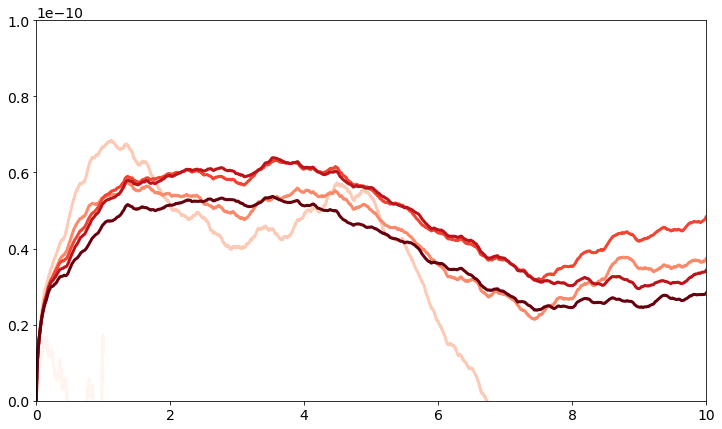

In [7]:
plt.figure(figsize=(12,7))
for c, ns in enumerate(lengths):
    plt.plot(viscos[f'{ns}-time']/1000, viscos[f'{ns}-visc'], c = plt.cm.Reds(plt.Normalize(0,5)(c)), linewidth=3)
plt.ylim(0,1e-10)
plt.xlim(0,10)

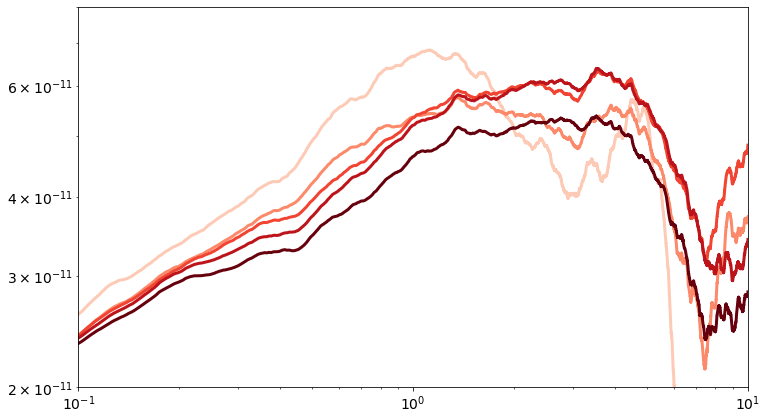

In [8]:
plt.figure(figsize=(12,7))
for c, ns in enumerate(lengths):
    plt.plot(viscos[f'{ns}-time']/1000, viscos[f'{ns}-visc'], c = plt.cm.Reds(plt.Normalize(0,5)(c)), linewidth=3)
plt.ylim(2e-11, 8e-11)
plt.xlim(1e-1, 10)

plt.yscale('log')
plt.xscale('log')

(-0.2, 2.0)

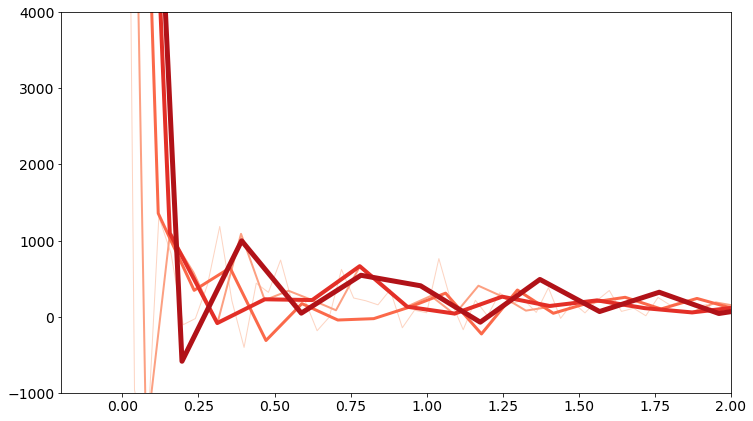

In [9]:
plt.figure(figsize=(12,7))
for c, ns in enumerate(lengths):
    plt.plot(viscos[f'{ns}-time'], viscos[f'{ns}-auto'], c = plt.cm.Reds(plt.Normalize(0,6)(c)), linewidth=c)
plt.ylim(-1000,4000)
# plt.yscale('symlog')
# plt.yscale('log')
plt.xlim(np.array([-0.1,1])*2)

# plt.yscale('symlog')
# plt.xscale('log')

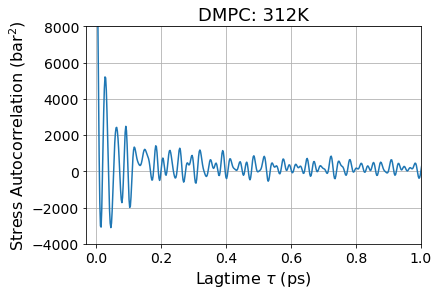

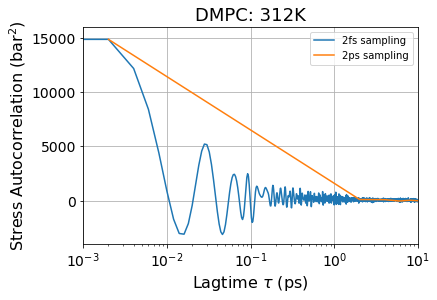

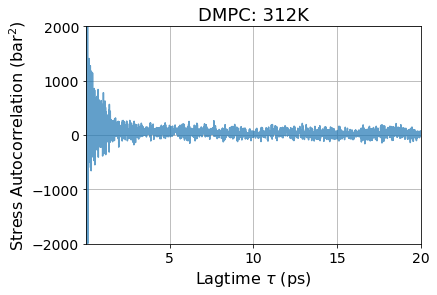

In [14]:
# plt.figure(figsize=(10,8))
plt.plot(viscos[f'1-time'], viscos[f'1-auto'], '-')
plt.ylim(-4000,8000)
plt.xlim(np.array([-0.03,1])*1)
plt.grid(b=True)

plt.title('DMPC: 312K', size=18)
# plt.title('Off-Diagonal Stress Autocorrelation \n$\left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_t$', size=20)
plt.ylabel('Stress Autocorrelation (bar$^2$)', size=16)
plt.xlabel('Lagtime $\\tau$ (ps)', size=16)

plt.show()

##################################################

# plt.figure(figsize=(10,8))
plt.plot(viscos[f'1-time'], viscos[f'1-auto'], '-', label='2fs sampling')

plt.plot(viscos[f'1-time'][1::1000], viscos[f'1-auto'][1::1000], '-',
         label='2ps sampling')

plt.ylim(-4000,16000)
plt.xscale('log')
plt.grid(b=True)
plt.xlim(1e-3,1e1)
plt.legend()

# plt.title('Off-Diagonal Stress Autocorrelation \n$\left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_t$', size=20)
plt.title('DMPC: 312K', size=18)
plt.ylabel('Stress Autocorrelation (bar$^2$)', size=16)
plt.xlabel('Lagtime $\\tau$ (ps)', size=16)

plt.show()

##################################################

plt.plot(viscos[f'1-time'], viscos[f'1-auto'], '-', alpha=0.7)
plt.ylim(-2000,2000)
# plt.xscale('log')
plt.grid(b=True)
plt.xlim(1e-2,20)

plt.title('DMPC: 312K', size=18)
# plt.title('Off-Diagonal Stress Autocorrelation \n$\left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_t$', size=20)
plt.ylabel('Stress Autocorrelation (bar$^2$)', size=16)
plt.xlabel('Lagtime $\\tau$ (ps)', size=16)

plt.show()

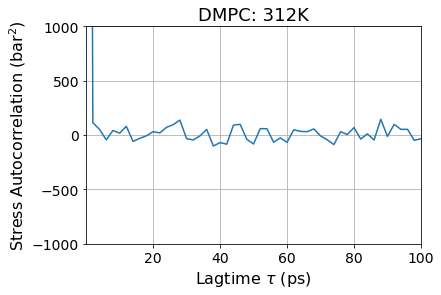

In [21]:
# plt.figure(figsize=(10,8))

plt.plot(viscos[f'1-time'][::1000], viscos[f'1-auto'][::1000], '-')

plt.ylim(-1000,1000)
# plt.xscale('log')
plt.grid(b=True)
plt.xlim(1e-3,1e2)

# plt.title('Off-Diagonal Stress Autocorrelation \n$\left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_t$', size=20)
plt.title('DMPC: 312K', size=18)
plt.ylabel('Stress Autocorrelation (bar$^2$)', size=16)
plt.xlabel('Lagtime $\\tau$ (ps)', size=16)

plt.show()